<a href="https://colab.research.google.com/github/flammarionick/Probability-Distributions_Group_9/blob/main/Group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **fraud detection system for credit card transactions**

1. **Poisson Distribution Implementation (NumPy)**

Numpy Implementation: [4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06 5.46305740e-07]
Scipy Implementation: [4.97870684e-02 1.49361205e-01 2.24041808e-01 2.24041808e-01
 1.68031356e-01 1.00818813e-01 5.04094067e-02 2.16040315e-02
 8.10151179e-03 2.70050393e-03 8.10151179e-04 2.20950322e-04
 5.52375804e-05 1.27471339e-05 2.73152870e-06 5.46305740e-07]


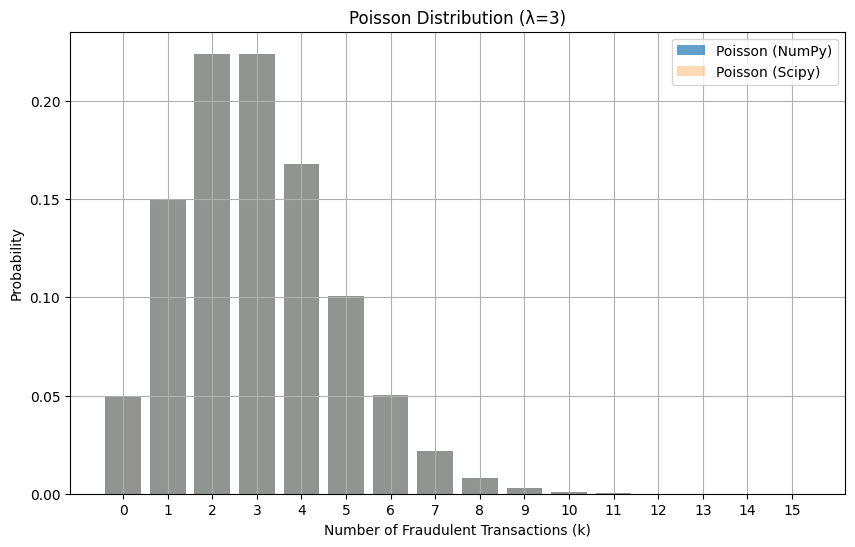

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math  # Import the math module
from scipy.stats import poisson

def poisson_probability(k, lambda_):
    """
    Calculates the Poisson probability of k events occurring given a rate lambda.

    Args:
        k (int or array-like): Number of events.
        lambda_ (float): Average rate of events.

    Returns:
        float or array-like: Poisson probability.
    """
    return (np.exp(-lambda_) * (lambda_**k)) / math.factorial(k) # Use math.factorial

def poisson_distribution_numpy(k_values, lambda_):
    """
    Calculates the Poisson distribution probabilities for a range of k values.

    Args:
        k_values (array-like): Array of k values.
        lambda_ (float): Average rate of events.

    Returns:
        array-like: Array of Poisson probabilities.
    """
    probabilities = []
    for k in k_values:
        probabilities.append(poisson_probability(k, lambda_))
    return np.array(probabilities)

# Parameters
lambda_ = 3  # Average rate of 3 fraudulent transactions per 10,000 transactions (or per day)
max_k = 15  # Maximum number of fraudulent transactions to visualize
k_values = np.arange(0, max_k + 1)

# Calculate probabilities using our numpy implementation
probabilities = poisson_distribution_numpy(k_values, lambda_)

# Calculate probabilities using scipy.stats for comparison
probabilities_scipy = poisson.pmf(k_values, lambda_)

# Print the values to verify.
print("Numpy Implementation:", probabilities)
print("Scipy Implementation:", probabilities_scipy)

# Visualization (Matplotlib):
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, alpha=0.7, label='Poisson (NumPy)')
plt.bar(k_values, probabilities_scipy, alpha=0.3, label = "Poisson (Scipy)")
plt.xlabel('Number of Fraudulent Transactions (k)')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (λ={lambda_})')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# BAYESIAN PROBABILITY

Updated Fraud Probability: 0.1404


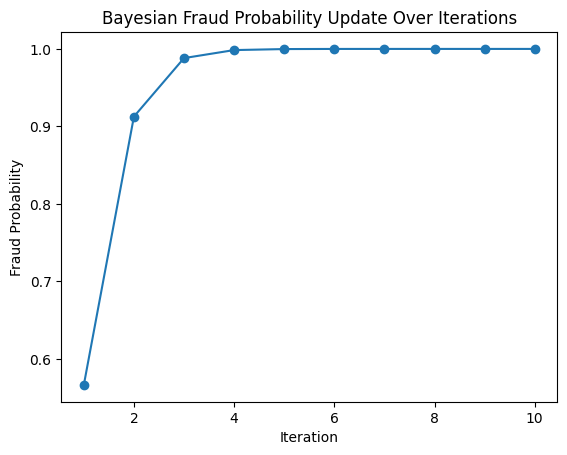

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud):
    """
    Computes the posterior probability of fraud given evidence using Bayes' theorem.
    """
    evidence_probability = (likelihood_fraud * prior_fraud) + (likelihood_non_fraud * (1 - prior_fraud))
    posterior_fraud = (likelihood_fraud * prior_fraud) / evidence_probability
    return posterior_fraud

# Initial Prior (based on historical fraud rates)
prior_fraud = 0.02  # 2% fraud transactions historically

# Likelihoods (based on past fraud detection data)
likelihood_fraud = 0.8  # 80% chance a fraudulent transaction has a certain unusual pattern
likelihood_non_fraud = 0.1  # 10% chance a normal transaction has the same pattern

# Compute posterior
posterior_fraud = bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud)
print(f"Updated Fraud Probability: {posterior_fraud:.4f}")

# Visualization
fraud_probabilities = []
iterations = np.arange(1, 11)
for i in iterations:
    prior_fraud = posterior_fraud  # Update prior with new posterior
    posterior_fraud = bayesian_fraud_detection(prior_fraud, likelihood_fraud, likelihood_non_fraud)
    fraud_probabilities.append(posterior_fraud)

plt.plot(iterations, fraud_probabilities, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Fraud Probability")
plt.title("Bayesian Fraud Probability Update Over Iterations")
plt.show()


**GRADIENT DESCENT**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [ ]:
# Simulated dataset with transaction features and fraud labels (0 = legitimate, 1 = fraud)
np.random.seed(42)  # For reproducibility
num_samples = 1000

# Generate random transaction amounts
transaction_amount = np.random.uniform(10, 5000, num_samples)

# Generate random transaction times (e.g., normalized 0-1)
transaction_time = np.random.uniform(0, 1, num_samples)

# Assign fraud labels (1 for fraud, 0 for non-fraud) based on transaction amount
fraud_labels = (transaction_amount > 4000).astype(int)  # Assume high amounts have higher fraud risk

# Create DataFrame
data = pd.DataFrame({
    'Amount': transaction_amount,
    'Time': transaction_time,
    'Fraud': fraud_labels
})

# Normalize features for better gradient descent performance
data['Amount'] = (data['Amount'] - data['Amount'].mean()) / data['Amount'].std()
data['Time'] = (data['Time'] - data['Time'].mean()) / data['Time'].std()

# Split into X (features) and y (labels)
X = data[['Amount', 'Time']].values
y = data['Fraud'].values


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
def cost_function(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost


In [ ]:
def gradient(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    return (1/m) * np.dot(X.T, (predictions - y))


In [ ]:
# Add intercept term (bias) to X
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add column of ones for bias term

# Initialize theta (parameters) to zero
initial_theta = np.zeros(X.shape[1])

# Optimize the parameters using gradient descent
result = minimize(cost_function, initial_theta, args=(X, y), method='BFGS', jac=gradient)

# Extract optimized parameters
optimal_theta = result.x

print("Optimal Parameters:", optimal_theta)

Optimal Parameters: [-58.20403703  56.63012149  -0.66718442]


<ipython-input-4-29a9089a91ac>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-4-29a9089a91ac>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-4-29a9089a91ac>:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-4-29a9089a91ac>:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


In [ ]:
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= 0.5).astype(int)  # Convert probabilities to 0 or 1

# Make predictions on dataset
predictions = predict(X, optimal_theta)

# Print accuracy
accuracy = np.mean(predictions == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 99.20%


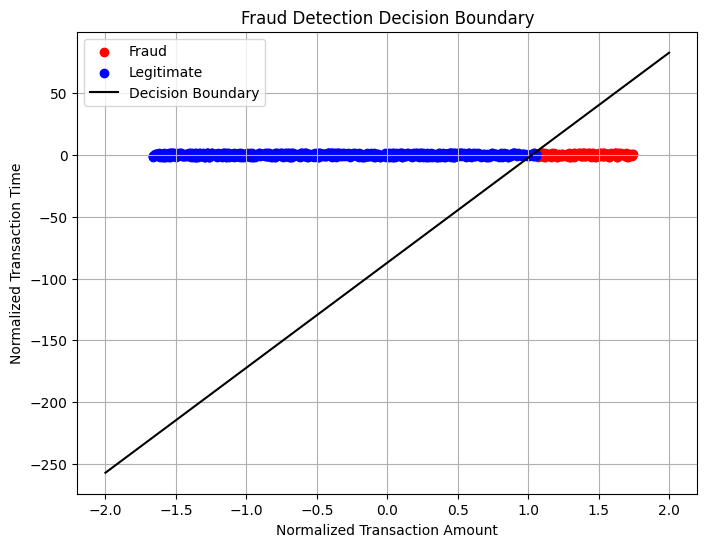

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot of fraudulent and non-fraudulent transactions
plt.scatter(data['Amount'][data['Fraud'] == 1], data['Time'][data['Fraud'] == 1], color='red', label="Fraud")
plt.scatter(data['Amount'][data['Fraud'] == 0], data['Time'][data['Fraud'] == 0], color='blue', label="Legitimate")

# Decision boundary line
x_vals = np.linspace(-2, 2, 100)
y_vals = -(optimal_theta[0] + optimal_theta[1] * x_vals) / optimal_theta[2]
plt.plot(x_vals, y_vals, color="black", label="Decision Boundary")

plt.xlabel("Normalized Transaction Amount")
plt.ylabel("Normalized Transaction Time")
plt.title("Fraud Detection Decision Boundary")
plt.legend()
plt.grid()
plt.show()


**Optimizing Gradient descent for better performance**

**Step 1:** Import Required Libraries
In this step, we import the essential Python libraries needed for our project. numpy helps with numerical computations, and matplotlib.pyplot is used for plotting graphs and visualizations.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Define Cost Function**
This function calculates the cost (or error) between the predicted and actual values. The goal is to minimize this cost during model training. The cost function helps evaluate how well our model fits the data.

In [7]:
def compute_cost(X, Y, m, b):
    n = len(Y)
    predictions = m * X + b
    cost = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)
    return cost


**Step 3: Implement Gradient Descent**
Gradient Descent is an optimization technique to minimize the cost function. In this step, the function adjusts the model parameters m (slope) and b (intercept) iteratively to reduce the cost and improve the model's performance

In [8]:
def gradient_descent(X, Y, learning_rate=0.01, iterations=100):
    m, b = 0, 0  # Initialize parameters
    n = len(Y)

    cost_history = []
    m_values = []
    b_values = []

    for i in range(iterations):
        predictions = m * X + b
        error = predictions - Y

        dm = (1 / n) * np.sum(error * X)
        db = (1 / n) * np.sum(error)

        m -= learning_rate * dm
        b -= learning_rate * db

        cost = compute_cost(X, Y, m, b)
        cost_history.append(cost)
        m_values.append(m)
        b_values.append(b)

    return m, b, cost_history, m_values, b_values


**Step 4: Generate Sample Data**

---


We create a small dataset with transaction amounts (X) and fraud risk (Y). To improve the performance of the Gradient Descent, we normalize the input values by dividing them by the maximum value in X

In [9]:
X = np.array([50, 200, 500, 1000, 5000])
Y = np.array([0, 0, 1, 1, 1])

X = X / np.max(X)  # Normalize the data


**Step 5: Run Gradient Descent & Store Results**

---


Now we run the gradient descent function to find the optimal values for m (slope) and b (intercept). We also store the history of the cost function and the values of m and b during the iterations.



In [10]:
m_opt, b_opt, cost_history, m_values, b_values = gradient_descent(X, Y, learning_rate=0.1, iterations=100)



**Step 6: Plot Cost Function Reduction**

---


This plot visualizes how the cost function decreases over time as the gradient descent algorithm optimizes the model. A decreasing cost shows that the model is learning and improving.

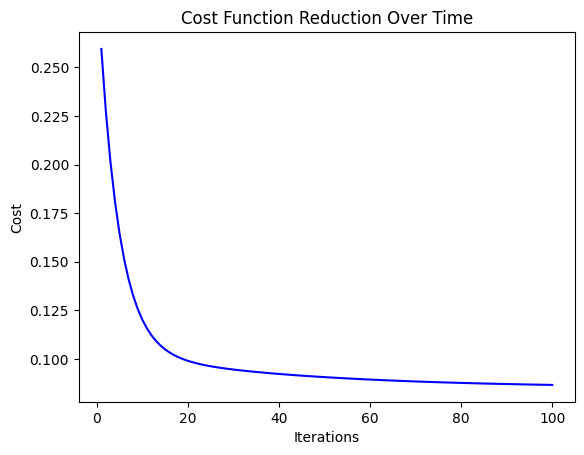

In [11]:
plt.plot(range(1, 101), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Reduction Over Time")
plt.show()


**Step 7: Visualize Parameter Updates**

---


Here we plot how the parameters m (slope) and b (intercept) change during the gradient descent process. This helps us understand how the algorithm converges towards the optimal values.

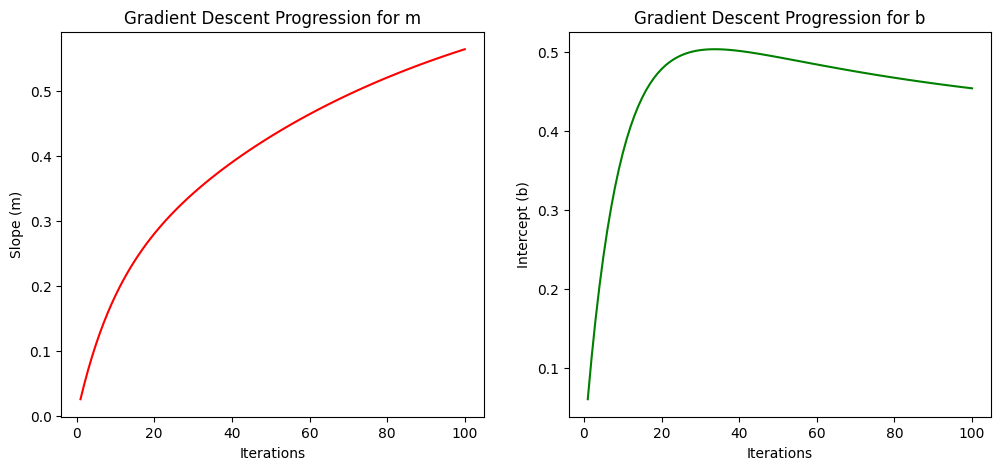

In [12]:
plt.figure(figsize=(12, 5))

# Plot for m values
plt.subplot(1, 2, 1)
plt.plot(range(1, 101), m_values, color='red')
plt.xlabel("Iterations")
plt.ylabel("Slope (m)")
plt.title("Gradient Descent Progression for m")

# Plot for b values
plt.subplot(1, 2, 2)
plt.plot(range(1, 101), b_values, color='green')
plt.xlabel("Iterations")
plt.ylabel("Intercept (b)")
plt.title("Gradient Descent Progression for b")

plt.show()


**Step 8: Plot Final Best Fit Line**

---


In the final step, we visualize how well our model has fit the data by plotting the optimized regression line over the actual data points.

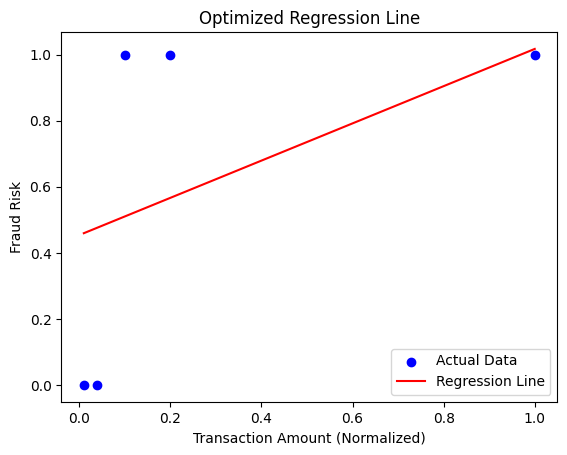

In [13]:
predictions = m_opt * X + b_opt

plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, predictions, color='red', label="Regression Line")

plt.xlabel("Transaction Amount (Normalized)")
plt.ylabel("Fraud Risk")
plt.title("Optimized Regression Line")
plt.legend()
plt.show()
